# FEATURE SELECTION 


In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('cleanedAlgerianForest.csv')
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [3]:
df['Classes'] = np.where(df['Classes'].str.strip() == 'not fire',0,1)
df['Fire'] = df['Classes']
df.drop(['Classes','day','month','year'],axis=1,inplace=True)

In [4]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Fire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
#dependent and independent features
x = df.drop('FWI',axis=1)
y = df['FWI']

In [6]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Fire
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,1,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,1,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,1,0


In [7]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

<Axes: >

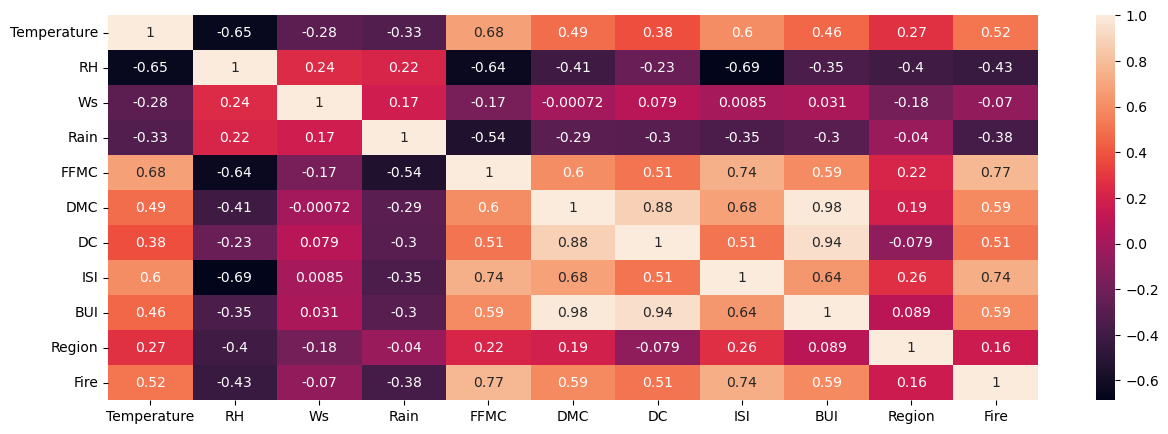

In [8]:
#checking multicolinearity
plt.figure(figsize=(15,5))
sns.heatmap(x.corr(),annot=True)

In [9]:
corr_matrix = x.corr()
def removeCorrelatedFeatures(Threshold):
    correlatedFeatures = set()
    #visit on upper triangle of matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i,j]) > Threshold):
                correlatedFeatures.add(corr_matrix.columns[i])
    return correlatedFeatures

In [10]:
print(removeCorrelatedFeatures(0.85))
x.drop(removeCorrelatedFeatures(0.85),axis=1,inplace=True)
# except Exception as e:
    # print(e)

{'DC', 'BUI'}


In [11]:
x.head()#these are less correlated independent features


,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region,Fire
0,29,57,18,0.0,65.7,3.4,1.3,0,0
1,29,61,13,1.3,64.4,4.1,1.0,0,0
2,26,82,22,13.1,47.1,2.5,0.3,0,0
3,25,89,13,2.5,28.6,1.3,0.0,0,0
4,27,77,16,0.0,64.8,3.0,1.2,0,0


<Axes: >

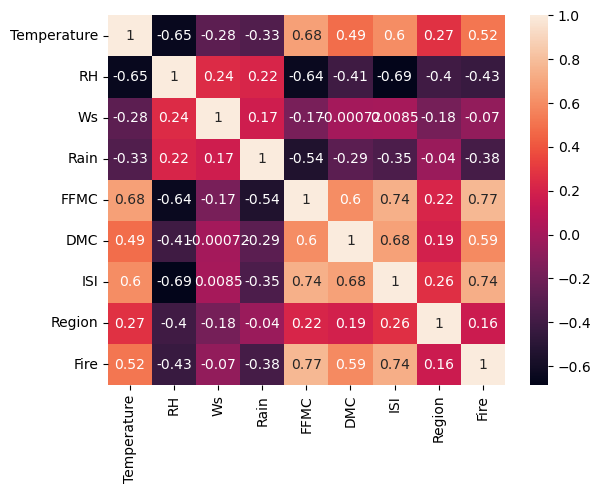

In [12]:
sns.heatmap(x.corr(),annot=True)

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split as tts 
x_train,x_test,y_train,y_test = tts(x,y,test_size= 0.25,random_state=32)

In [14]:
x_train.shape

(182, 9)

## STANDARDIZATOIN

In [15]:
from sklearn.preprocessing import StandardScaler as SS 
scaler = SS()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
x_train_scaled

array([[-0.8824737 ,  1.81290518, -0.90550422, ..., -0.91526231,
        -1.02222494, -1.19443152],
       [ 0.19725883,  1.39709076,  1.92979501, ..., -0.12014183,
        -1.02222494,  0.83721836],
       [-0.8824737 , -1.44430778, -2.67756623, ..., -0.54254959,
         0.97825827,  0.83721836],
       ...,
       [-1.42233997, -0.26616692,  0.5121454 , ...,  0.94830132,
         0.97825827,  0.83721836],
       [ 0.46719196, -0.05825971, -0.90550422, ..., -0.86556728,
        -1.02222494, -1.19443152],
       [-1.15240683,  0.91197393,  0.15773299, ..., -0.3934645 ,
         0.97825827,  0.83721836]])

#

Text(0.5, 1.0, 'Before scaling')

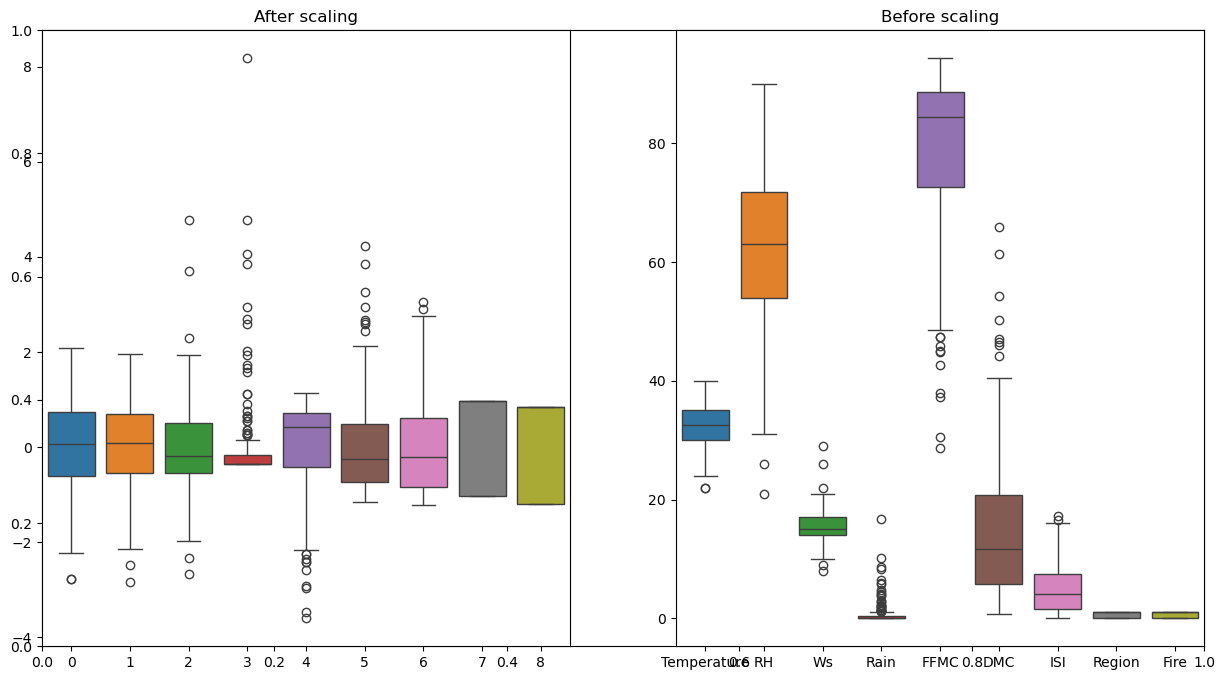

In [17]:
# effect of scaling
plt.subplots(figsize = (15,8))
plt.subplot(1,2,1)
plt.title("After scaling")
sns.boxplot(x_train_scaled)
plt.subplot(1,2,2)
sns.boxplot(x_train)
plt.title("Before scaling")


# MODEL TRAINING

In [18]:
from sklearn.linear_model import LinearRegression as LR 
model = LR(n_jobs=-1)
model.fit(x_train_scaled,y_train)

LinearRegression(n_jobs=-1)

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error  
MAE = mean_absolute_error(y_test,model.predict(x_test_scaled))
MSE = mean_squared_error(y_test,model.predict(x_test_scaled))
rmse = np.sqrt(MSE)
print(f"root mean squared err {rmse}, mean absolute err {MAE}, mean squared err {MSE}")

root mean squared err 1.9832156490525739, mean absolute err 0.746627989532729, mean squared err 3.933144310647022


In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,model.predict(x_test_scaled))
r2

0.9345976867745527

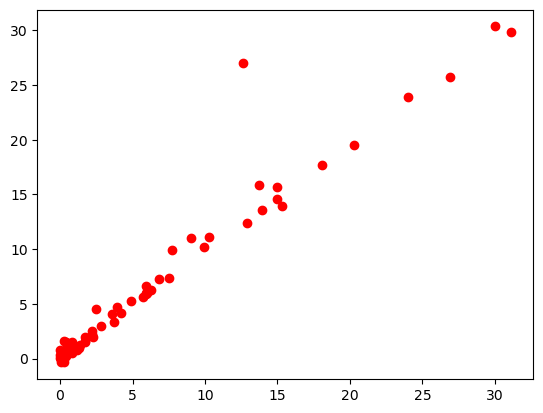

In [21]:
y_pred = model.predict(x_test_scaled)
plt.scatter(y_test,y_pred,color='red')

# Ridge Regression 

In [22]:
from sklearn.linear_model import Ridge
model1 = Ridge()
model1.fit(x_train_scaled,y_train)

Ridge()

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error  
MAE = mean_absolute_error(y_test,model1.predict(x_test_scaled))
MSE = mean_squared_error(y_test,model1.predict(x_test_scaled))
rmse = np.sqrt(MSE)
print(f"root mean squared err {rmse}, mean absolute err {MAE}, mean squared err {MSE}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test,model1.predict(x_test_scaled))
r2

root mean squared err 1.9566841699580892, mean absolute err 0.749255514727432, mean squared err 3.828612940964577


0.9363358872680737

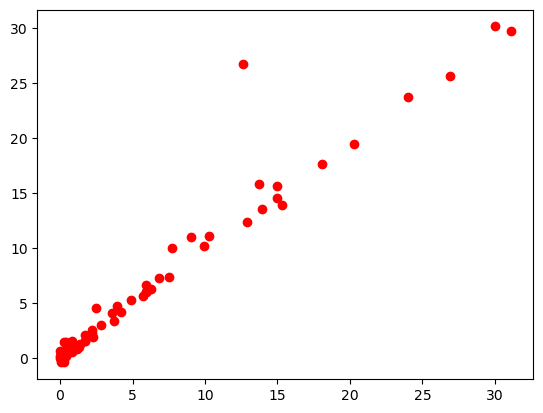

In [24]:
y_pred = model1.predict(x_test_scaled)
plt.scatter(y_test,y_pred,color='red')

# lasso

root mean squared err 2.101358089886947, mean absolute err 1.3793044556835745, mean squared err 4.415705821933319
0.9265734098553822


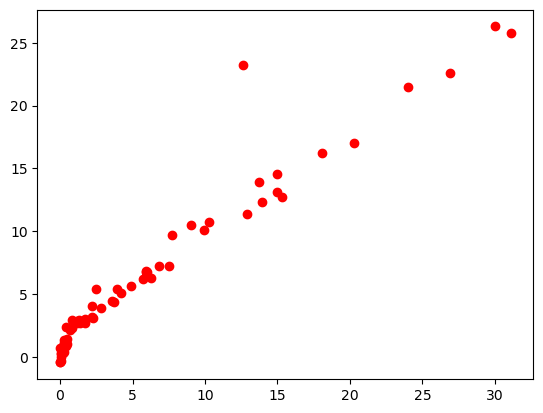

In [25]:
from sklearn.linear_model import Lasso
model2 = Lasso()
model2.fit(x_train_scaled,y_train)

from sklearn.metrics import mean_absolute_error,mean_squared_error  
MAE = mean_absolute_error(y_test,model2.predict(x_test_scaled))
MSE = mean_squared_error(y_test,model2.predict(x_test_scaled))
rmse = np.sqrt(MSE)
print(f"root mean squared err {rmse}, mean absolute err {MAE}, mean squared err {MSE}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test,model2.predict(x_test_scaled))
print(r2)

y_pred = model2.predict(x_test_scaled)
plt.scatter(y_test,y_pred,color='red')


# elasticNet

root mean squared err 2.6593692803332187, mean absolute err 1.956406890049301, mean squared err 7.072244969180023
0.882399133072919


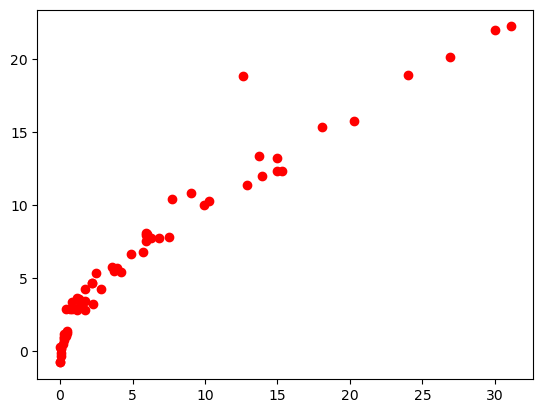

In [26]:
from sklearn.linear_model import ElasticNet
model3 = ElasticNet()
model3.fit(x_train_scaled,y_train)

from sklearn.metrics import mean_absolute_error,mean_squared_error  
MAE = mean_absolute_error(y_test,model3.predict(x_test_scaled))
MSE = mean_squared_error(y_test,model3.predict(x_test_scaled))
rmse = np.sqrt(MSE)
print(f"root mean squared err {rmse}, mean absolute err {MAE}, mean squared err {MSE}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test,model3.predict(x_test_scaled))
print(r2)

y_pred = model3.predict(x_test_scaled)
plt.scatter(y_test,y_pred,color='red')


# lassoCV 
1. Loss = (Sum of Squared Errors) + α * (sum of absolute coefficients)
2. we adjust the value of alpha using cross validation
### working
1. Har alpha ke liye 5-fold cross-validation karega.

2. Jis alpha pe test error sabse kam aata hai, use best alpha maan lega.

3. lasso_cv.alpha_ me woh best value store hoti hai

4. similarily we so in RidgeCV

In [27]:

from sklearn.linear_model import LassoCV 
model4 = LassoCV(cv=5)
model4.fit(x_test_scaled,y_test)

LassoCV(cv=5)

In [28]:
model4.alpha_#which alpha is selected

0.19138411152452198

In [29]:
model4.mse_path_.shape

(100, 5)

In [30]:
model4.alphas_.shape

(100,)

In [31]:
y_pred = model4.predict(x_test_scaled)
y_pred.shape,x_test_scaled.shape

((61,), (61, 9))

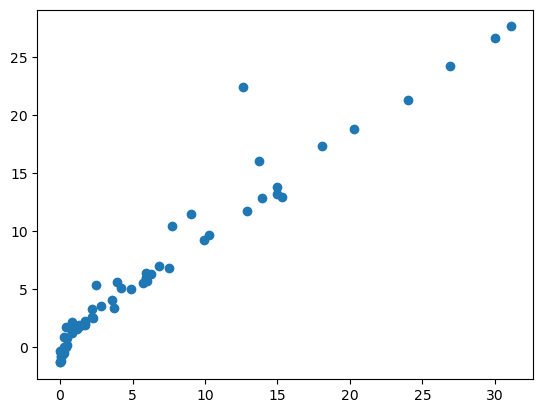

In [32]:
plt.scatter(y_test,y_pred)

# ASSUMPTIONS FOR A BETTER MODEL
1. Y_TEST AND Y_PRED MUST FOLLOW LINEAR RELATION
2. RESIDUALS(Y_TEST - Y_PRED) MUST BE A NORMAL DISTRIBUTION 
3. Y_PRED VS RESIDUALS MUST FOLLOW UNIFORM DISTRIBUTION

### WE CAN ALSO SAVE THE MODEL IN PICKLE FORMAT SO THAT IT COULD BE STORED IN HARD DISK, AND WE CAN DEPLOY IT ANYWHERE


In [33]:
import pickle
pickle.dump(model1,open('model1.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))

In [34]:
newModel1 = pickle.load(open('model1.pkl','rb'))
newScaler = pickle.load(open('scaler.pkl','rb'))

In [35]:
newModel1.coef_

array([-6.47097771e-02,  2.53978738e-03,  2.98635909e-02, -5.04282703e-02,
       -8.91427096e-01,  3.36040972e+00,  5.02401091e+00, -3.13631515e-01,
        3.37351891e-01])

In [36]:
model1.coef_

array([-6.47097771e-02,  2.53978738e-03,  2.98635909e-02, -5.04282703e-02,
       -8.91427096e-01,  3.36040972e+00,  5.02401091e+00, -3.13631515e-01,
        3.37351891e-01])

In [37]:
newScaler.mean_

array([32.26923077, 61.84065934, 15.55494505,  0.70934066, 78.57692308,
       14.74395604,  4.88351648,  0.51098901,  0.58791209])

In [38]:
scaler.mean_

array([32.26923077, 61.84065934, 15.55494505,  0.70934066, 78.57692308,
       14.74395604,  4.88351648,  0.51098901,  0.58791209])

we can see that both are same and have same fit

In [39]:
x_test.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Region',
       'Fire'],
      dtype='object')